<a href="https://colab.research.google.com/github/ariahosseini/DeepML/blob/main/005_TensorFlow_Proj_Five_CNN_KerasTuner_LaEterna_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Import data manipulation packages
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings
from google.colab import drive
# Import deep learning tools
import tensorflow as tf
from tensorflow.keras.layers import (Input, Lambda, Dense,
                                     Flatten, Dropout, Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import (image, image_dataset_from_directory)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
from kerastuner.tuners import RandomSearch

In [ ]:
# Set GPU
physical_devices = tf.config.experimental.list_physical_devices(device_type='GPU')
print("No. GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(device=physical_devices[0], enable=True)
# Mount google drive
drive.mount('/content/drive')

No. GPUs available:  1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())
print(os.listdir())

/content/drive/My Drive/LaEterna
['.DS_Store', 'Train', 'Test']


In [ ]:
os.chdir("drive/MyDrive/LaEterna/")

In [ ]:
# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

In [ ]:
# Define image dataset
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2,
                                     shear_range =.25, zoom_range =.2,
                                     horizontal_flip = True, rotation_range=20)
# Train and validation split
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./Train',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./Train',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="validation",
                                                 class_mode='categorical')
# Organize data for our predictions
image_generator_submission = ImageDataGenerator(rescale=1/255)
submission = image_generator_submission.flow_from_directory(
                                                 directory='./Test',
                                                 shuffle=False,
                                                 target_size=(224, 224),
                                                 class_mode=None)

Found 430 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


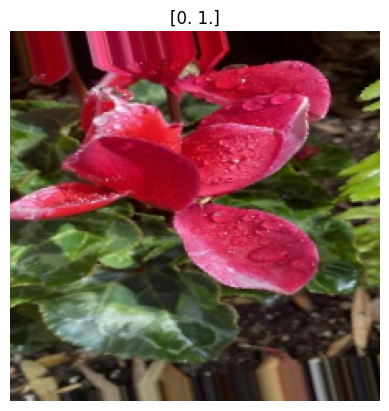

In [ ]:
# Show flowers for the first batch
batch_one_img = train_dataset[0]
for i in range(0,1): # batch_size is equal to 32 so 1 should change to 32 in practice
    img = batch_one_img[0][i]
    lab = batch_one_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [ ]:
# Experiment with convolutional neural net
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, 3, activation='relu',
                            input_shape = [224, 224,3]),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2, activation ='softmax')
    ]
)

In [ ]:
# Compile
model.compile(loss = 'binary_crossentropy',optimizer='adam',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         restore_best_weights=True)

In [ ]:
# Fit
model.fit(train_dataset, epochs=5, validation_data=validation_dataset, callbacks=callback)

Epoch 1/5
14/14 [==============================] - 18s 1s/step - loss: 0.1488 - accuracy: 0.9349 - val_loss: 0.3898 - val_accuracy: 0.8774
Epoch 2/5
14/14 [==============================] - 15s 1s/step - loss: 0.1736 - accuracy: 0.9372 - val_loss: 0.0874 - val_accuracy: 0.9717
Epoch 3/5
14/14 [==============================] - 9s 638ms/step - loss: 0.1358 - accuracy: 0.9395 - val_loss: 0.1264 - val_accuracy: 0.9434
Epoch 4/5
14/14 [==============================] - 8s 599ms/step - loss: 0.1201 - accuracy: 0.9488 - val_loss: 0.1477 - val_accuracy: 0.9340
Epoch 5/5
14/14 [==============================] - 14s 990ms/step - loss: 0.0844 - accuracy: 0.9674 - val_loss: 0.2017 - val_accuracy: 0.9245


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(validation_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 [==============================] - 1s 309ms/step - loss: 0.0851 - accuracy: 0.9623
Loss: 0.0850938931107521
Accuracy: 0.9622641801834106


In [ ]:
# Prediction
pred = model.predict(submission)
print(pred.round())

4/4 [==============================] - 0s 84ms/step
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# Data augmentation
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                       input_shape=(224,224,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.RandomContrast(0.1),
])
model_aug = Sequential([data_augmentation, model])
model_aug.compile(loss = 'binary_crossentropy',optimizer='adam',
                  metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         restore_best_weights=True)
model_aug.fit(train_dataset, epochs=5, validation_data=validation_dataset, callbacks=callback)


loss, accuracy = model_aug.evaluate(validation_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)
model_aug.predict(submission).round()

Epoch 1/5
14/14 [==============================] - 11s 611ms/step - loss: 0.1537 - accuracy: 0.9442 - val_loss: 0.2268 - val_accuracy: 0.9245
Epoch 2/5
14/14 [==============================] - 9s 621ms/step - loss: 0.1308 - accuracy: 0.9605 - val_loss: 0.2008 - val_accuracy: 0.9151
Epoch 3/5
14/14 [==============================] - 8s 536ms/step - loss: 0.1113 - accuracy: 0.9512 - val_loss: 0.2380 - val_accuracy: 0.9057
Epoch 4/5
14/14 [==============================] - 9s 631ms/step - loss: 0.1043 - accuracy: 0.9674 - val_loss: 0.2148 - val_accuracy: 0.9151
Epoch 5/5
4/4 [==============================] - 1s 322ms/step - loss: 0.1360 - accuracy: 0.9434
Loss: 0.13596901297569275
Accuracy: 0.9433962106704712
4/4 [==============================] - 0s 74ms/step


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
# Data prep
final_data = []
final_labels = []

for i in range(0,len(train_dataset)):
    batch = train_dataset[i]
    for j in range(len(batch[0])):
        final_data.append(batch[0][j])
        final_labels.append(batch[1][j])

val_data = []
val_labels = []

for i in range(0,len(validation_dataset)):
    batch = validation_dataset[i]
    for j in range(len(batch[0])):
        val_data.append(batch[0][j])
        val_labels.append(batch[1][j])

final_data = np.array(final_data)
final_labels = np.array(final_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

In [ ]:
# Tune params
def build_model(hp):
    model = keras.Sequential([data_augmentation])
    model.add(keras.layers.AveragePooling2D(4,2))

    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
        model.add(keras.layers.MaxPool2D((3,3)))

    #model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256]), activation='relu'))

    model.add(keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=4,
)

tuner.search(final_data, final_labels, validation_data=(val_data, val_labels), epochs=5)

Trial 4 Complete [00h 00m 07s]
val_loss: 0.30597636103630066

Best val_loss So Far: 0.13235333561897278
Total elapsed time: 00h 00m 26s


In [ ]:
# Best model
best_model = tuner.get_best_models()[0]
best_model.summary()
loss, accuracy = best_model.evaluate(validation_dataset)
print("LOSS", loss)
print("ACCURACY", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 average_pooling2d (Average  (None, 111, 111, 3)       0         
 Pooling2D)                                                      
                                                                 
 conv2d (Conv2D)             (None, 109, 109, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 36, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 16)        0

In [ ]:
onlyfiles = [f.split('.')[0] for f in os.listdir(os.path.join('Test/images')) if os.path.isfile(os.path.join(os.path.join('Test/images'), f))]
submission_df = pd.DataFrame(onlyfiles, columns =['images'])
submission_df[['la_eterna','other_flower']] = best_model.predict(submission)
submission_df.head()
submission_df.to_csv('submission_file.csv', index = False)

4/4 [==============================] - 0s 87ms/step
